In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL3Byb2Nfc3RvY2hhc3RpcXVl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_33526/973001745.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
# Simulation d'un modèle à vol stochastique de Taylor

# r_t = exp(x_t/2)*eps_t (eps_t iid N(0,1))
# x_t = mu + phi * x_{t-1} + sigma_t * eta_t  (eta_t iid N(0,1))

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Paramètres
n = 252
mu = -0.8
phi = 0.9
sigma_squared = 0.09

# Simulation
# np.random.seed(0)

# x = np.zeros(n)
# r = np.zeros(n)

# for t in range(0, n):
#     if t == 0:
#         x[t] = np.random.normal(loc= mu/(1-phi), scale=np.sqrt(sigma_squared/(1-phi**2))) # Densité de transition stationnaire de x_t
#     else:
#         x[t] = mu + phi * x[t-1] + np.sqrt(sigma_squared) * np.random.normal(loc=0, scale=1)
#     r[t] = np.exp(x[t]/2) * np.random.normal(loc=0, scale=1)

data  = pd.read_csv('true_sv_taylor.csv')
r = data['r']
x = data['x']

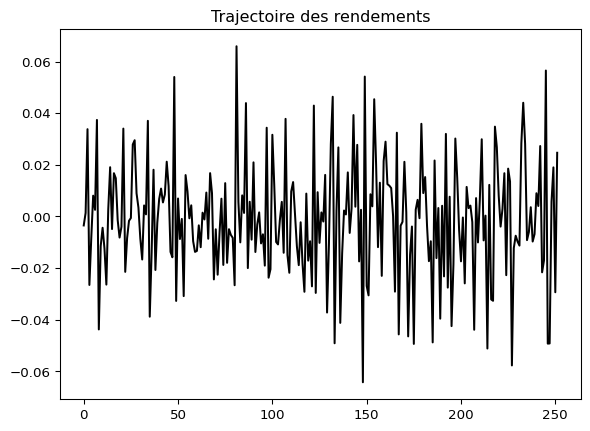

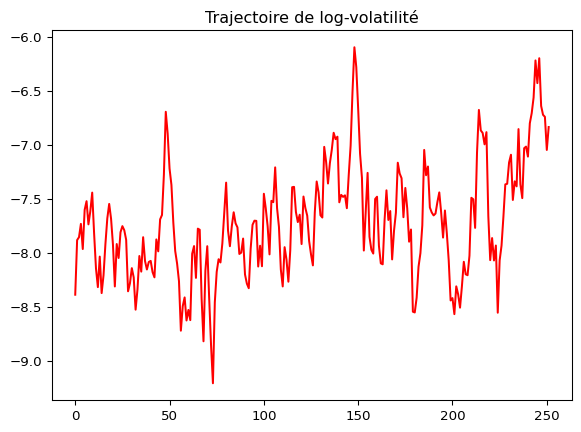

In [3]:
# Affichage des trajectoires
import matplotlib.pyplot as plt

plt.plot(r, color="black")
plt.title("Trajectoire des rendements")
plt.show()

plt.plot(x, color='red')
plt.title("Trajectoire de log-volatilité")
plt.show()

In [4]:
# Construction du modèle log-SV (modèle de Taylor)

# Pour appliquer le filtre de Kalman, il faut que les bruits soient centrés.
mu_r_squared = -1.27 # car log(eps**2) suit une log chi-deux
y = np.log(r**2) - mu_r_squared

In [5]:
# Script de filtre de kalman pour estimer la volatilité à chaque instant t en supposant les paramètres connus

def kalman_filter(y, mu, phi, sigma_squared, n, init_x, init_P):
    x_hat = np.zeros(n)
    P = np.zeros(n)

    # Initialisation
    x_hat[0] = init_x
    P[0] = init_P # Plus P est grand moins on fait confiance à l'apriori sur la valeur de la volatilité

    for t in range(1, n):
        # Prédiction
        x_hat_m = mu + phi * x_hat[t-1] 
        P_m = phi**2 * P[t-1] + sigma_squared
        y_m = x_hat_m

        # Mise à jour
        K = P_m / (P_m + (np.pi**2)/2)
        P[t] = (1 - K) * P_m
        x_hat[t] = x_hat_m + K * (y[t] - y_m)
    return x_hat, P, K

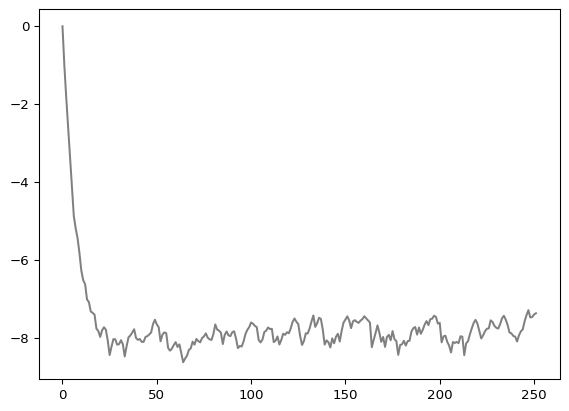

In [6]:
# Initialisation à 0 et 0.01
init_x = 0
init_P = 0.01
x_hat, P, K = kalman_filter(y, mu, phi, sigma_squared, n, init_x, init_P)
plt.plot(x_hat, color='grey', label='Volatilité estimée')

MSE =  0.2794557366826766
MAE =  0.4120099778966342
RMSE =  0.5286357315606622


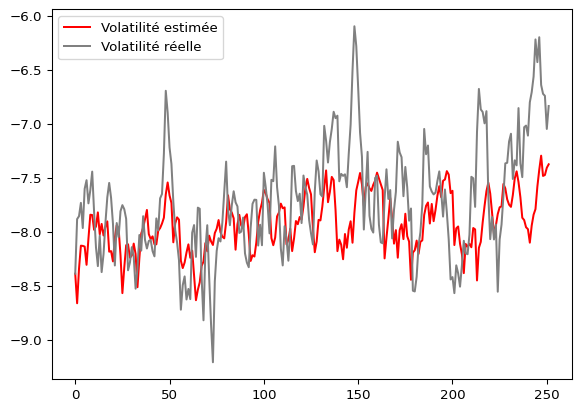

In [7]:
# Initialisation à x_0 et sigma_squared/(1-phi**2)
init_x = x[0]
init_P = sigma_squared/(1-phi**2)
x_hat, P, K = kalman_filter(y, mu, phi, sigma_squared, n, init_x, init_P)
plt.plot(x_hat, color='red', label='Volatilité estimée')
plt.plot(x, color='grey', label = 'Volatilité réelle')
plt.legend()


# Compute MSE, MAE, and RMSE
mse = np.mean((x - x_hat)**2)
mae = np.mean(np.abs(x - x_hat))
rmse = np.sqrt(mse)
print("MSE = ", mse)
print("MAE = ", mae)
print("RMSE = ", rmse)

MSE =  0.27543214871007066
MAE =  0.4078063371140131
RMSE =  0.5248162999660649


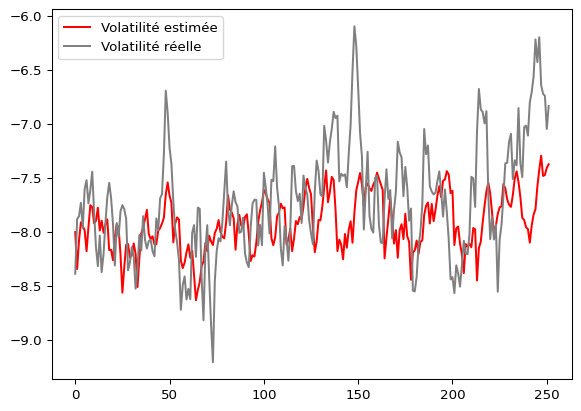

In [8]:
# Initialisation à mu/(1-phi) et sigma_squared/(1-phi**2)
init_x = mu/(1-phi)
init_P = sigma_squared/(1-phi**2)
x_hat, P, K = kalman_filter(y, mu, phi, sigma_squared, n, init_x, init_P)
plt.plot(x_hat, color='red', label='Volatilité estimée')
plt.plot(x, color='grey', label = 'Volatilité réelle')
plt.legend()

# Compute MSE, MAE, RMSE
mse = np.mean((x - x_hat)**2)
mae = np.mean(np.abs(x - x_hat))
rmse = np.sqrt(mse)
print("MSE = ", mse)
print("MAE = ", mae)
print("RMSE = ", rmse)

In [9]:
import numpy as np
from scipy.optimize import minimize

# Define the log-likelihood function for the log-SV model with Kalman filter
def log_sv_kalman(params, y):
    # Extract parameters
    mu, phi, sigma_eta = params

    # Number of observations
    n = len(y)

    # Initialize state and variance
    x_t = mu  # Initial state (log-volatility)
    P_t = sigma_eta**2 / (1 - phi**2)  # Initial variance (stationarity assumption)

    # Log-likelihood accumulator
    log_likelihood = 0

    for t in range(n):
        # Observation equation: y_t ~ x_t + nu_t

        # Prediction step
        y_t_pred = x_t
        F_t = P_t + np.pi**2 / 2  # Variance of observation noise

        # Update step
        v_t = y[t] - y_t_pred  # Prediction error
        K_t = P_t / F_t  # Kalman gain
        x_t = x_t + K_t * v_t
        P_t = (1 - K_t) * P_t + sigma_eta**2  # Update variance

        # Update log-likelihood
        log_likelihood += -0.5 * (np.log(2 * np.pi) + np.log(F_t) + (v_t**2 / F_t))

        # State evolution
        x_t = mu + phi * (x_t - mu)  # State equation

    return -log_likelihood  # Negative log-likelihood for minimization

# Initial parameter guesses
initial_params = [-0.7, 0.8, np.sqrt(0.05)]

# Constrain phi between -1 and 1 and sigma_eta > 0
bounds = [(-np.inf, np.inf), (-1, 1), (1e-6, np.inf)]

# Optimize parameters using the log-likelihood function
result = minimize(log_sv_kalman, initial_params, args=(y,), bounds=bounds, method='L-BFGS-B')

# Extract estimated parameters
mu_est, phi_est, sigma_eta_est = result.x

# Print results
print("Estimated parameters:")
print(f"mu: {mu_est:.4f}")
print(f"phi: {phi_est:.4f}")
print(f"sigma_eta: {sigma_eta_est:.4f}")

Estimated parameters:
mu: -0.8021
phi: 0.8001
sigma_eta: 1.2184
